In [1]:
import numpy as np
import pandas as pd

RANDOM_PICK = 100
DIR= "/data/project/Alzheimer/EM_cluster/pilot/04.EM_input/pyclone"
df = pd.read_csv (DIR + "/tables/loci.tsv", sep = "\t")

# pyclone의 clustering 정보만 가져온다
b1 = df[df["sample_id"] == "block0"].iloc[:, 0:3]
b2 = df[df["sample_id"] == "block1"].iloc[:, 0:3]
b = pd.merge (b1, b2, left_on = "mutation_id", right_on = "mutation_id")

# 각 mutation_id의 vaf 정보를 가져오기 위함
np_vaf = pd.read_csv("/data/project/Alzheimer/EM_cluster/pilot/04.EM_input/sampling_" + str(RANDOM_PICK) + ".txt", sep = "\t")
np_vaf.rename(columns = {"Unnamed: 0":"mutation_id"}, inplace = True) 
np_vaf.head()

b = pd.merge (b, np_vaf, left_on = "mutation_id", right_on = "mutation_id")
b["size"] = 100

### Visualization

<AxesSubplot:xlabel='Feature 1 : VAF*2 of Block 1', ylabel='Feature 2 : VAF*2 of Block 2'>

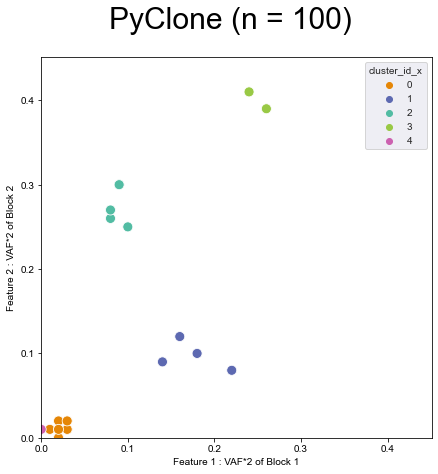

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import palettable

vivid_10 = palettable.cartocolors.qualitative.Vivid_10.mpl_colors
colorlist = {key:value for key, value in enumerate(vivid_10)}

plt.figure (figsize = (7,7))
plt.suptitle ("PyClone (n = {0})".format(np_vaf.shape[0]), fontsize = 30)
plt.axis ([0,  np.max(np.array(np_vaf.iloc[:,1:4])) * 1.1,  0,  np.max(np.array(np_vaf.iloc[:,1:4])) * 1.1])
plt.xlabel ("Feature 1 : VAF*2 of Block 1")
plt.ylabel ("Feature 2 : VAF*2 of Block 2")

palette = sns.color_palette("Paired")
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.scatterplot(data = b, x = 'block0', y = 'block1', hue = "cluster_id_x", palette = colorlist, s = 100)

In [3]:
b

,mutation_id,sample_id_x,cluster_id_x,sample_id_y,cluster_id_y,block0,block1,block2,membership_answer,size
0,chr10_17823177,block0,0,block1,0,0.02,0.01,0.04,FP,100
1,chr11_129124844,block0,0,block1,0,0.03,0.02,0.03,V5_het,100
2,chr11_6546843,block0,1,block1,1,0.22,0.08,0.24,MRC5_het,100
3,chr12_109404049,block0,0,block1,0,0.03,0.01,0.05,V5_het,100
4,chr12_47967220,block0,0,block1,0,0.01,0.01,0.02,FP,100
5,chr12_6355415,block0,1,block1,1,0.16,0.12,0.19,V3_het,100
6,chr16_29744381,block0,0,block1,0,0.02,0.00,0.05,V5_het,100
7,chr17_63538184,block0,1,block1,1,0.14,0.09,0.13,V3_het,100
8,chr17_68044059,block0,0,block1,0,0.02,0.01,0.05,V5_het,100
9,chr17_68126629,block0,0,block1,0,0.03,0.01,0.04,V5_het,100


In [7]:
import scoring
maxmaxmax_membership =  list(b["cluster_id_x"])
membership_answer_old = list(b["membership_answer"])
membership_answer_new = scoring.Sorting(membership_answer_old )

membership_answer_old
membership_answer_new
membership_answer_max, score, sample_dict_rev = scoring.Scoring \
    (membership_answer_old, membership_answer_new, maxmaxmax_membership)

In [9]:
sample_dict_rev

{3: 'FP', 0: 'V5_het', 4: 'MRC5_het', 1: 'V3_het', 2: 'V1_het'}